# Chennai House Price Prediction

### Chennai House Price Prediction (Regression)
ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.
They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.
Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



### Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

### House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


## Loading Dataset

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('chennai_house_price_prediction.csv')
df.shape

(7109, 19)

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


## Data Exploration

In [4]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P00917,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### Data types

In [6]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [7]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_value_count'] = df.nunique()
temp

,data_type,null_count,unique_value_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


## Univarient Analysis

### Histograms

Text(0.5, 0, 'Sales price')

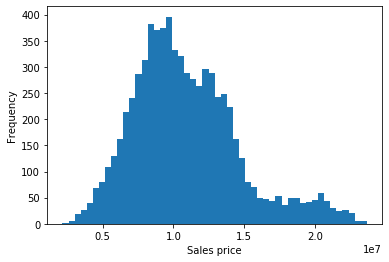

In [8]:
# Sales price
df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales price')

- Slightly right skewed.
- Less number of houses with high price

Text(0.5, 0, 'Sqft')

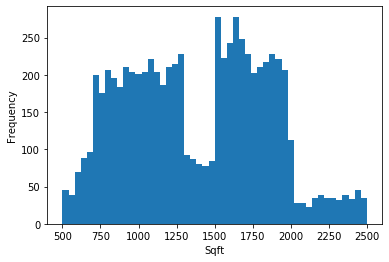

In [9]:
# Area of the house in sqft
df['INT_SQFT'].plot.hist(bins=50)
plt.xlabel('Sqft')

- Most houses have the area between **750 sq feet to 1250 sq feet** or around **1500 sq feet to 2000 sq feet**
- Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

### Value Counts

In [10]:
# Number of bedrooms
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [11]:
# Number of Bathrooms
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [12]:
# Number of Rooms
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [13]:
# Praking facility
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [14]:
# Build type
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [15]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [16]:
#Street
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [17]:
# Mz zone
df['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [18]:
# Area
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

### Bar plots

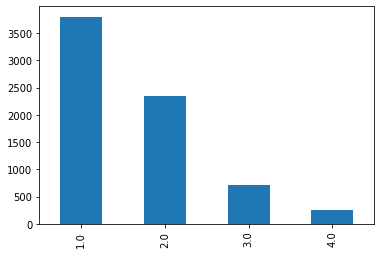

In [19]:
df['N_BEDROOM'].value_counts().plot.bar()

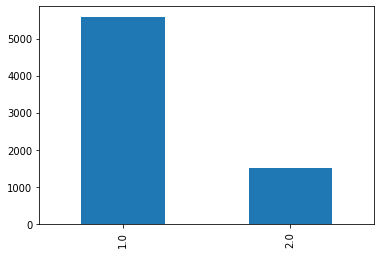

In [20]:
df['N_BATHROOM'].value_counts().plot.bar()

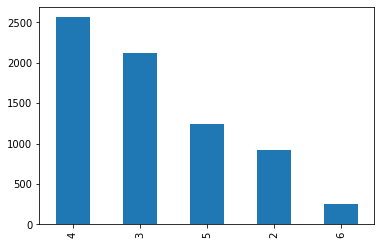

In [21]:
df['N_ROOM'].value_counts().plot.bar()

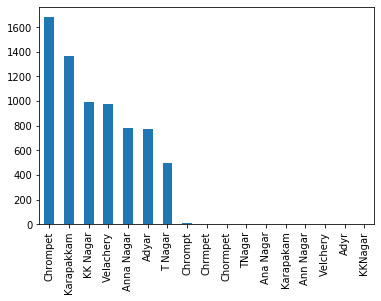

In [22]:
# Location
df['AREA'].value_counts().plot.bar()

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name
- maximum houses are in the area Chrompet, followed by Karapakkam

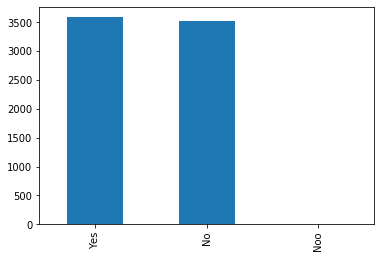

In [23]:
# houses with parking facility

df['PARK_FACIL'].value_counts().plot.bar()

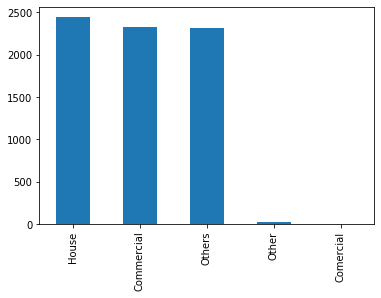

In [24]:
df['BUILDTYPE'].value_counts().plot.bar()

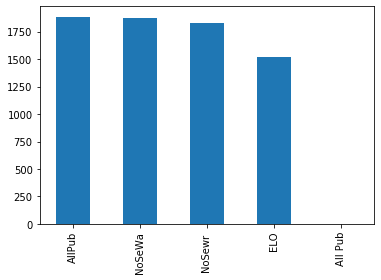

In [25]:
df['UTILITY_AVAIL'].value_counts().plot.bar()

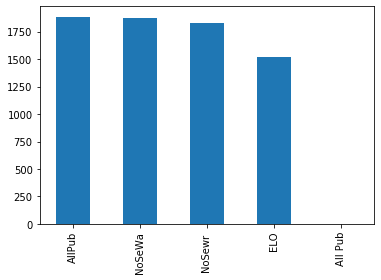

In [26]:
df['UTILITY_AVAIL'].value_counts().plot.bar()

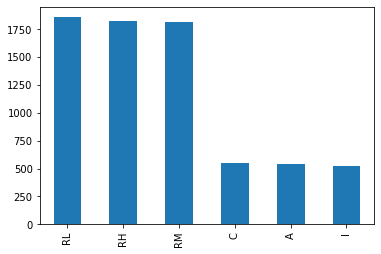

In [27]:
df['MZZONE'].value_counts().plot.bar()

## Data Manipulation

- Drop Duplicates
- Fill missing values
- Correct the data types
- Fix spelling errors

### Drop Duplicates

In [28]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [29]:
df.shape

(7109, 19)

- No duplicates

### Fill missing values

In [30]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

#### N_BEDROOM

In [31]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

#### N_BATHROOM

In [32]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i]):
        if (df['N_BEDROOM'][i]==1.0):
            df['N_BATHROOM'][i]=1.0
        else:
            df['N_BATHROOM'][i]=2.0

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### QS_OVERALL

In [33]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [34]:
temp = (df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'],temp],axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [35]:
for i in range(0,len(df)):
    if pd.isnull(df['QS_OVERALL'][i]):
        df['QS_OVERALL'][i]=temp[i]

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Data Types

In [37]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [38]:
for i in range(0,len(df)):
    df['N_BEDROOM'][i] = int(df['N_BEDROOM'][i])
    df['N_BATHROOM'][i] = int(df['N_BATHROOM'][i])

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df = df.astype({'N_BEDROOM':'object','N_ROOM':'object','N_BATHROOM':'object'})
df['N_BEDROOM'].head()

0    1
1    2
2    1
3    3
4    1
Name: N_BEDROOM, dtype: object

### Replaceing Categories

#### Update names in columns
- AREA
- SALE_COND
- PARK_FACIL
- BUILDTYPE
- UTILITY_AVAIL
- STREET

In [40]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [41]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [42]:
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar','Adyr':'Adyar','KKNagar':'KK Nagar',
                                'Chormpet':'Chrompet','Chrompt':'Chrompet','Chrmpet':'Chrompet',
                                'Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar',
                                'Karapakam':'Karapakkam','Velchery':'Velachery'})
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [43]:
df['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [44]:
df['SALE_COND'] = df['SALE_COND'].replace({'Partiall':'Partial','PartiaLl':'Partial',
                                          'Ab Normal':'AbNormal','Adj Land':'AdjLand'})
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [45]:
df['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [46]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [47]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [48]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [49]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [50]:
df['STREET'] = df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'})
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

## Bivariant Analysis

In [51]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

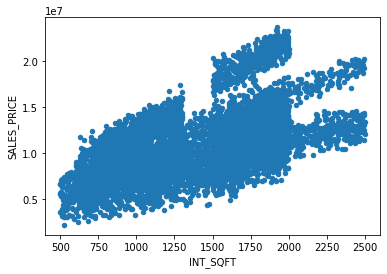

In [52]:
# Price vs area in sqft

df.plot.scatter('INT_SQFT','SALES_PRICE')

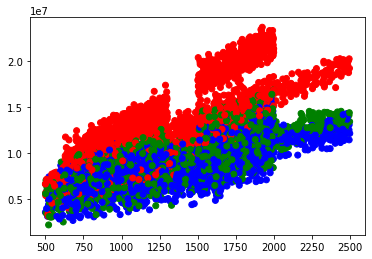

In [53]:
fig,ax = plt.subplots()
colors = {'Commercial':'red','House':'blue','Others':'green'}
ax.scatter(df['INT_SQFT'],df['SALES_PRICE'],c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [54]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


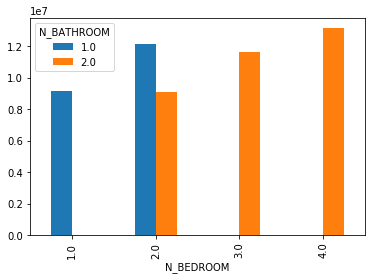

In [55]:
df.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median').plot.bar()

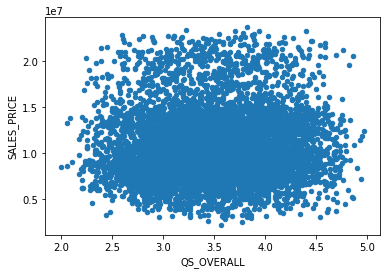

In [56]:
df.plot.scatter('QS_OVERALL','SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

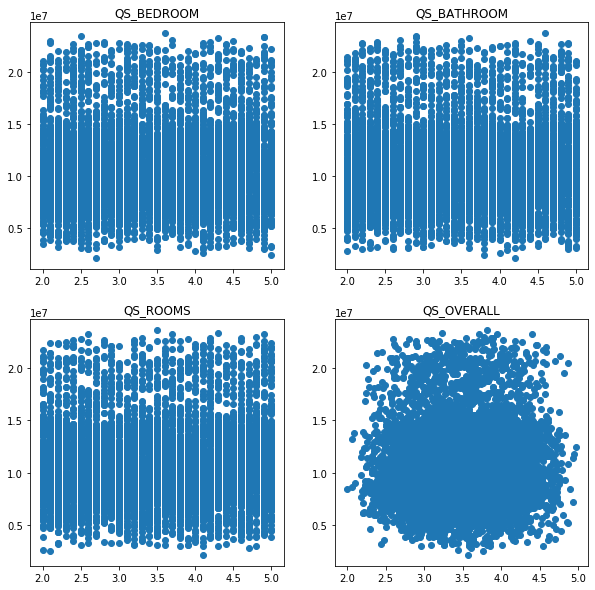

In [57]:
fig,axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BEDROOM'],df['SALES_PRICE'])
axs[0,0].set_title('QS_BEDROOM')

axs[0,1].scatter(df['QS_BATHROOM'],df['SALES_PRICE'])
axs[0,1].set_title('QS_BATHROOM')

axs[1,0].scatter(df['QS_ROOMS'],df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'],df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')

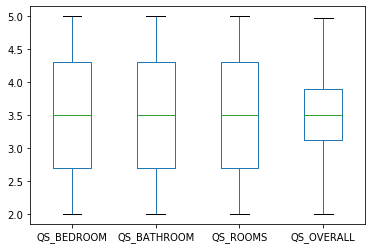

In [58]:
df[['QS_BEDROOM','QS_BATHROOM','QS_ROOMS','QS_OVERALL']].plot.box()

In [59]:
df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

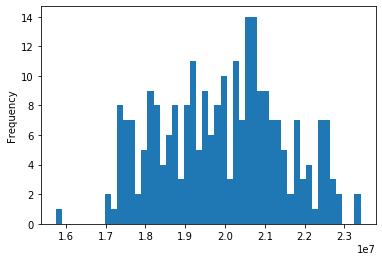

In [60]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

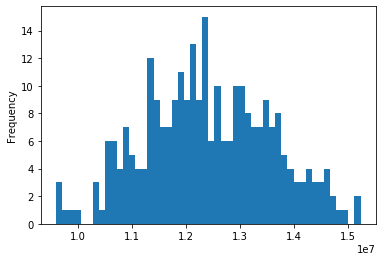

In [61]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

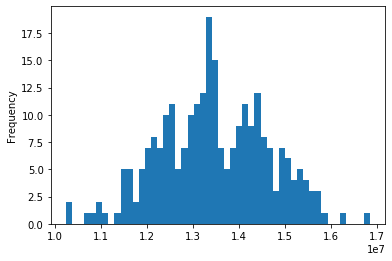

In [62]:
temp_df = df.loc[(df['BUILDTYPE']=='Others')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

#### Surrounding and Locality

In [63]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

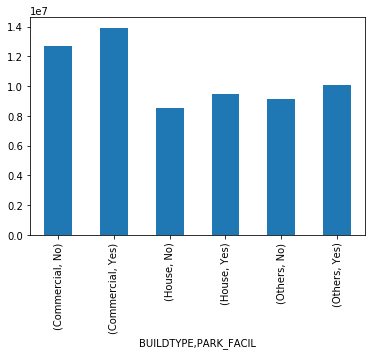

In [64]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median().plot.bar()

In [65]:
df.groupby(['AREA']).SALES_PRICE.median()

AREA
Adyar          8878350
Anna Nagar    13727895
Chrompet       9606725
KK Nagar      12146740
Karapakkam     7043125
T Nagar       14049650
Velachery     10494410
Name: SALES_PRICE, dtype: int64

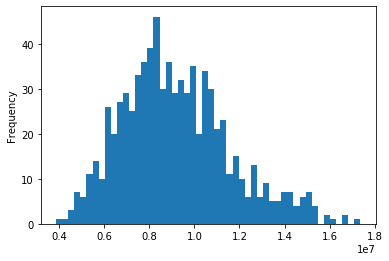

In [66]:
temp_df=df.loc[(df['AREA']=='Adyar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

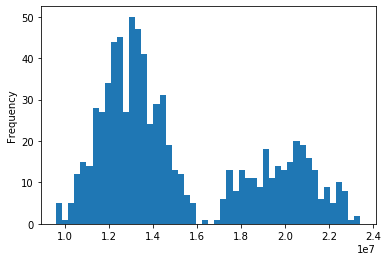

In [67]:
temp_df=df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

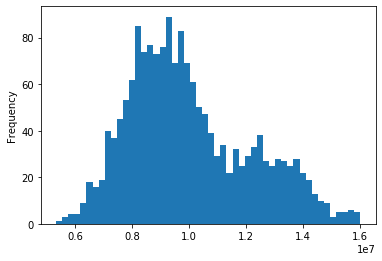

In [68]:
temp_df=df.loc[(df['AREA']=='Chrompet')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

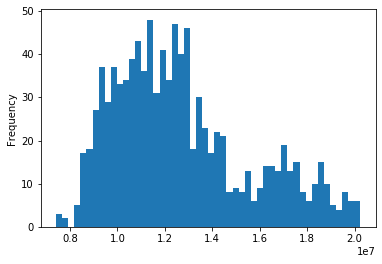

In [69]:
temp_df=df.loc[(df['AREA']=='KK Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

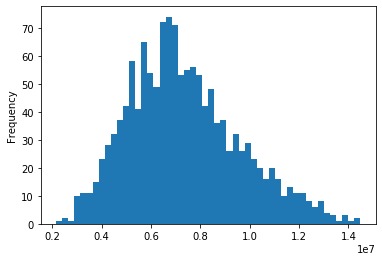

In [70]:
temp_df=df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

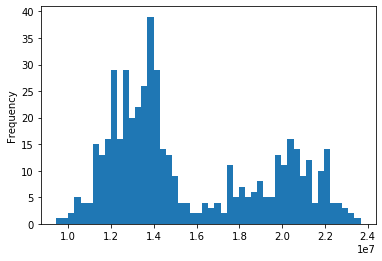

In [71]:
temp_df=df.loc[(df['AREA']=='T Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

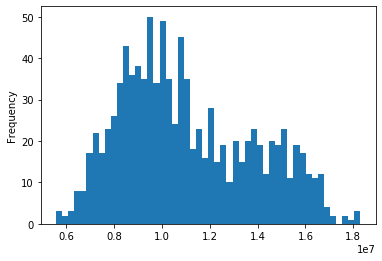

In [72]:
temp_df=df.loc[(df['AREA']=='Velachery')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

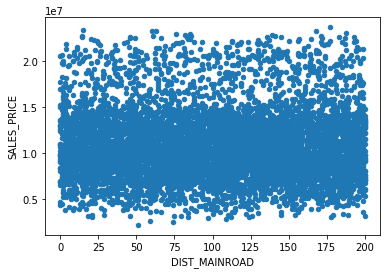

In [73]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

In [74]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

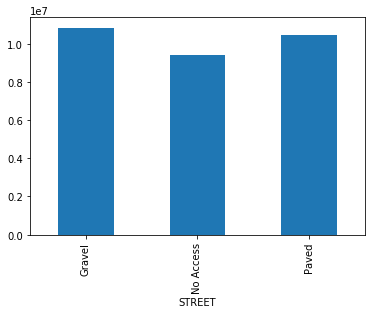

In [75]:
df.groupby(['STREET']).SALES_PRICE.median().plot.bar()

#### House Sale Price

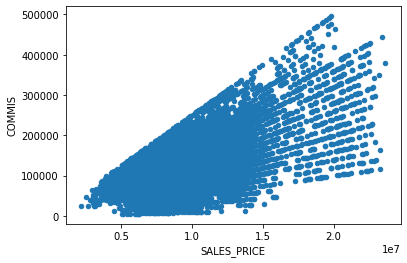

In [76]:
df.plot.scatter('SALES_PRICE','COMMIS')

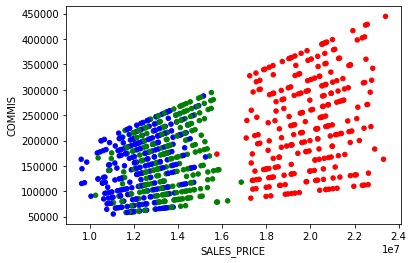

In [77]:
temp_df=df.loc[(df['AREA']=='Anna Nagar')]
colors = {'Commercial':'red','House':'blue','Others':'green'}
temp_df.plot.scatter('SALES_PRICE','COMMIS',c=temp_df['BUILDTYPE'].apply(lambda x: colors[x]))

### Heat map

In [78]:
corr = df.corr()
corr

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.019850,-0.008337,0.008865,0.012408,0.571076,0.612125
DIST_MAINROAD,0.002022,1.000000,0.002237,-0.029468,0.001554,-0.016678,0.010994,0.018783
QS_ROOMS,0.019850,0.002237,1.000000,0.008828,0.007789,0.517224,0.009377,0.021967
QS_BATHROOM,-0.008337,-0.029468,0.008828,1.000000,-0.011745,0.551826,-0.000471,-0.011377
QS_BEDROOM,0.008865,0.001554,0.007789,-0.011745,1.000000,0.629948,0.020118,0.018804
QS_OVERALL,0.012408,-0.016678,0.517224,0.551826,0.629948,1.000000,0.017057,0.020016
COMMIS,0.571076,0.010994,0.009377,-0.000471,0.020118,0.017057,1.000000,0.626275
SALES_PRICE,0.612125,0.018783,0.021967,-0.011377,0.018804,0.020016,0.626275,1.000000


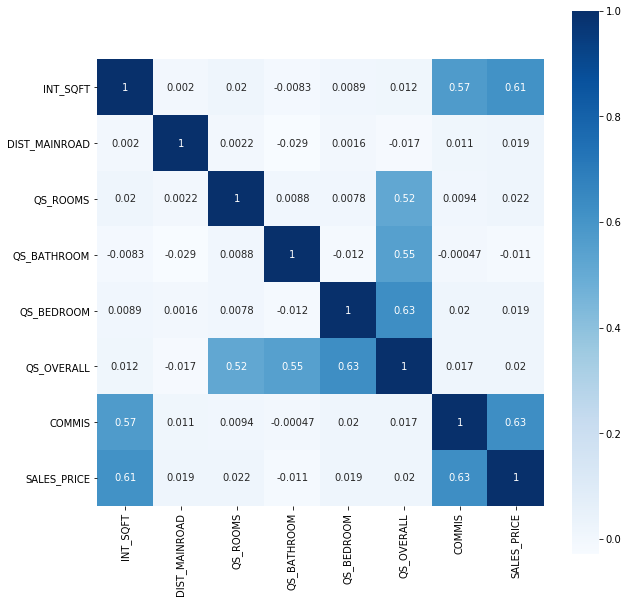

In [79]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues',ax=ax)

## Preparing Dataset

In [80]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


### Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
#Area
le_area = LabelEncoder()
df['AREA'] = le_area.fit_transform(df['AREA'])

In [83]:
#Sale Condition
le_sc = LabelEncoder()
df['SALE_COND'] = le_sc.fit_transform(df['SALE_COND'])

In [84]:
#Parking facility
le_pf = LabelEncoder()
df['PARK_FACIL'] = le_pf.fit_transform(df['PARK_FACIL'])

In [85]:
#Building Type
le_bt = LabelEncoder()
df['BUILDTYPE'] = le_bt.fit_transform(df['BUILDTYPE'])

In [86]:
#Utility and Availability
le_ua = LabelEncoder()
df['UTILITY_AVAIL'] = le_ua.fit_transform(df['UTILITY_AVAIL'])

In [87]:
#Street
le_s = LabelEncoder()
df['STREET'] = le_s.fit_transform(df['STREET'])

In [88]:
#MZZONE
le_mz = LabelEncoder()
df['MZZONE'] = le_mz.fit_transform(df['MZZONE'])

In [89]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,4,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,1,1986,26,2,1,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,6,1855,14,3,2,5,2,0,2,3,2,2,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,2,1220,36,2,1,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,2,1167,137,1,1,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,6,1847,176,3,2,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,2,771,175,1,1,2,1,0,2,3,2,5,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,6,1635,74,2,1,4,0,0,2,1,1,2,3.1,3.1,3.3,3.160,121255,8083650


In [90]:
df.dtypes

PRT_ID            object
AREA               int32
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND          int32
PARK_FACIL         int32
BUILDTYPE          int32
UTILITY_AVAIL      int32
STREET             int32
MZZONE             int32
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

### One Hot Encoding

In [91]:
dummies_area = pd.get_dummies(df['AREA'])

In [92]:
dummies_bedroom = pd.get_dummies(df['N_BEDROOM'])

dummies_bathroom = pd.get_dummies(df['N_BATHROOM'])

dummies_room = pd.get_dummies(df['N_ROOM'])

In [93]:
dummies_sc = pd.get_dummies(df['SALE_COND'])

In [94]:
dummies_bt = pd.get_dummies(df['BUILDTYPE'])

In [95]:
dummies_uv = pd.get_dummies(df['UTILITY_AVAIL'])

In [96]:
dummies_s = pd.get_dummies(df['STREET'])

In [97]:
dummies_mz = pd.get_dummies(df['MZZONE'])

In [98]:
df1 = df.drop(['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','BUILDTYPE',
              'UTILITY_AVAIL','STREET','MZZONE'],axis='columns')
df1.head()

,PRT_ID,INT_SQFT,DIST_MAINROAD,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,1004,131,1,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,1986,26,0,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,909,70,1,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,1855,14,0,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,1226,84,1,3.0,2.5,4.1,3.290,74063,7406250


In [99]:
df1 = pd.concat([df1,dummies_area.drop([0],axis='columns')],axis='columns')

df1 = pd.concat([df1,dummies_bedroom],axis='columns')
df1 = pd.concat([df1,dummies_bathroom],axis='columns')
df1 = pd.concat([df1,dummies_room],axis='columns')

df1 = pd.concat([df1,dummies_sc.drop([0],axis='columns')],axis='columns')

df1 = pd.concat([df1,dummies_bt.drop([0],axis='columns')],axis='columns')

df1 = pd.concat([df1,dummies_uv.drop([0],axis='columns')],axis='columns')

df1 = pd.concat([df1,dummies_s.drop([0],axis='columns')],axis='columns')

df1 = pd.concat([df1,dummies_mz.drop([0],axis='columns')],axis='columns')

In [100]:
df1.head(10)

,PRT_ID,INT_SQFT,DIST_MAINROAD,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,...,1,2,3,1,2,1,2,3,4,5
0,P03210,1004,131,1,4.0,3.9,4.9,4.330,144400,7600000,...,0,0,0,0,1,0,0,0,0,0
1,P09411,1986,26,0,4.9,4.2,2.5,3.765,304049,21717770,...,0,0,0,0,0,0,0,1,0,0
2,P01812,909,70,1,4.1,3.8,2.2,3.090,92114,13159200,...,1,0,0,0,0,0,0,0,1,0
3,P05346,1855,14,0,4.7,3.9,3.6,4.010,77042,9630290,...,0,0,1,0,1,0,1,0,0,0
4,P06210,1226,84,1,3.0,2.5,4.1,3.290,74063,7406250,...,0,0,0,0,0,1,0,0,0,0
5,P00219,1220,36,0,4.5,2.6,3.1,3.320,198316,12394750,...,0,1,0,1,0,0,0,1,0,0
6,P09105,1167,137,0,3.6,2.1,2.5,2.670,33955,8488790,...,0,0,0,1,0,0,0,0,1,0
7,P09679,1847,176,0,2.4,4.5,2.1,3.260,235204,16800250,...,0,0,0,0,0,0,0,0,0,1
8,P03377,771,175,0,2.9,3.7,4.0,3.550,33236,8308970,...,0,0,1,0,1,0,0,0,0,1
9,P09623,1635,74,0,3.1,3.1,3.3,3.160,121255,8083650,...,1,0,0,1,0,0,1,0,0,0


In [101]:
X = df1.drop(['PRT_ID','SALES_PRICE'],axis='columns')
X.head()

,INT_SQFT,DIST_MAINROAD,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,1,2,...,1,2,3,1,2,1,2,3,4,5
0,1004,131,1,4.0,3.9,4.9,4.330,144400,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,0,4.9,4.2,2.5,3.765,304049,1,0,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1,4.1,3.8,2.2,3.090,92114,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,0,4.7,3.9,3.6,4.010,77042,0,0,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1,3.0,2.5,4.1,3.290,74063,0,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
y = df1['SALES_PRICE']
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

In [103]:
#Feature Scaleing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-0.82660819,  0.54699179,  0.99089808, ..., -0.58704248,
        -0.5948423 , -0.58595943],
       [ 1.32040901, -1.28230608, -1.00918552, ...,  1.70345423,
        -0.5948423 , -0.58595943],
       [-1.03431352, -0.51574316,  0.99089808, ..., -0.58704248,
         1.68111783, -0.58595943],
       ...,
       [ 0.50707866,  0.91285136, -1.00918552, ..., -0.58704248,
        -0.5948423 , -0.58595943],
       [-1.30105089, -1.0383997 ,  0.99089808, ..., -0.58704248,
         1.68111783, -0.58595943],
       [ 1.12363553,  0.9825389 ,  0.99089808, ..., -0.58704248,
        -0.5948423 , -0.58595943]])

In [104]:
sc_y = StandardScaler()
y = np.array(y)
y = sc_y.fit_transform(y.reshape(-1,1))
y

array([[-0.87436671],
       [ 2.87205109],
       [ 0.60087235],
       ...,
       [-0.67496583],
       [-0.63367707],
       [-0.24372271]])

In [105]:
# Test Train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Regression

### Support Vector Machine

In [106]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf',degree=5)
svm.fit(X_train, y_train)

C:\Users\praneeth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [107]:
pred_svm = svm.predict(X_test)
pred_svm = sc_y.inverse_transform(pred_svm)

In [108]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svm,X,y,cv=10)
scores.sort()
accuracy_svm=scores.mean()
#acc.update({'SupportVectorMachine': accuracy_svm})
    
print(scores)
print(accuracy_svm)

C:\Users\praneeth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneeth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneeth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\praneeth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[0.98795294 0.98874563 0.98880644 0.98885353 0.98908745 0.98948396
 0.98977169 0.98990065 0.99034293 0.99053135]
0.9893476569237111


In [109]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_svm)

-135732952518930.28

## Saving the model to disk

In [111]:
import joblib
filename = 'model.pkl'
joblib.dump(svm,open(filename,'wb'))